## Assignment 5

### SIR model

#### Using Euler method

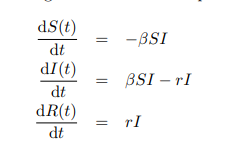

In [20]:
import pandas as pd
import numpy as np

In [3]:
N = 10**6

In [141]:
def SIR_euler(beta, r, N=10**6, h=1, n=1000):
    """
    Function to generate numeric solution to SIR model using Euler method for different values of:
    
    * beta (float) - infectivity parameter
    * r (float) - recovery rate per capita
    * n (int) - population size
    * h (float) - time step for euler calculation (usually called dt)
    """
    S = np.zeros(n)
    I = np.zeros(n)
    R = np.zeros(n)
    S[0] = N
    I[0] = 1
    R[0] = 0
    for i in range(1, n):
        S[i] = S[i-1] + h*((-beta)*S[i-1]*I[i-1])
        I[i] = I[i-1] + h*(beta*S[i-1]*I[i-1] - r*I[i-1])
        R[i] = R[i-1] + h*(r*I[i-1])
    df = pd.DataFrame(list(zip(list(range(0, n)), S, I, R)),
               columns =['t', 'susceptible', 'infected', 'recovered'])
    return df

In [186]:
beta1 = 0.00005
r1 = 0.4
df1 = SIR_euler(beta1, r1, 10**6, 0.003)

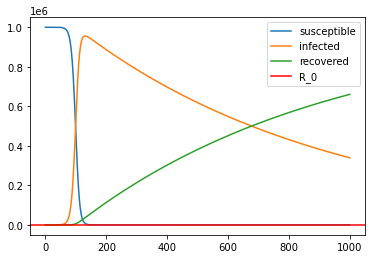

In [187]:
plt.plot(df1['t'], df1['susceptible'], label='susceptible')
plt.plot(df1['t'], df1['infected'], label='infected')
plt.plot(df1['t'], df1['recovered'], label='recovered')
plt.axhline(beta1*N/r1, color='r', label='R_0')
plt.legend()

In [197]:
beta2 = 0.0000004
r2 = 0.7
df2 = SIR_euler(beta2, r2, 10**6, 0.001)

In [ ]:
plt.plot(df2['t'], df2['susceptible'], label='susceptible')
plt.plot(df2['t'], df2['infected'], label='infected')
plt.plot(df2['t'], df2['recovered'], label='recovered')
plt.axhline(beta2*N/r2, color='r', label='R_0')
plt.legend()

#### SIR model on a network

In [6]:
import networkx as nx
import random
import os
from matplotlib import pyplot as plt, animation
import imageio
import glob
from PIL import Image

In [7]:
def SIR_on_graph(G, p, starting_node=0):
    """
        Function that generates SIR model simulations on a graph with arguments:
        
        G (networkx.Graph()) - graph to simulate the model on
        p (float) - probability of infection 
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    #infected_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R']:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
    
#     label = nx.get_node_attributes(G, 'state') 
#     nx.draw(G, labels=label)
    return G, infected_fraction

In [ ]:
def MC_SIR(G, steps, starting_node=0):
    
    for i in range(steps):
        

In [8]:
RG = nx.erdos_renyi_graph(100, 0.4)
WSM = nx.watts_strogatz_graph(100, 15, 0.6)
BAM = nx.barabasi_albert_graph(100, 10)

## Analysis of infected fraction

#### Random graph

In [9]:
_, RG_infected_025 = SIR_on_graph(RG, 0.25)
_, RG_infected_05 = SIR_on_graph(RG, 0.5)
_, RG_infected_075 = SIR_on_graph(RG, 0.75)

In [200]:
_, WSM_infected_025 = SIR_on_graph(WSM, 0.25)
_, WSM_infected_05 = SIR_on_graph(WSM, 0.5)
_, WSM_infected_075 = SIR_on_graph(WSM, 0.75)

KeyboardInterrupt: 

In [149]:
_, BAM_infected_025 = SIR_on_graph(BAM, 0.25)
_, BAM_infected_05 = SIR_on_graph(BAM, 0.5)
_, BAM_infected_075 = SIR_on_graph(BAM, 0.75)

KeyboardInterrupt: 

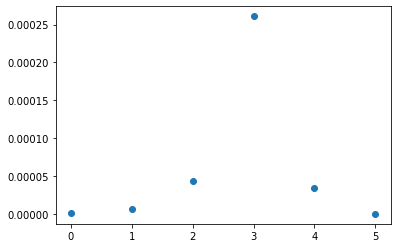

In [10]:
plt.scatter(range(0, len(RG_infected_075)), RG_infected_075)

## Visualization attempt

In [72]:
def SIR_for_gif(G, p, starting_node=0):
    """
    Function that generates SIR model simulations on a graph while resulting full state matrix for animation purpose
        
    * G (networkx.Graph()) - graph to simulate the model on
    * p (float) - probability of infection 
    """
    d = {node : 'S' for node in G.nodes()}
    nx.set_node_attributes(G, d, 'state')

    #infected_node = random.choice(list(G.nodes()))
    d[starting_node] = 'I'
    nx.set_node_attributes(G, d, 'state')
    
    infected_list = [starting_node]
    infected_fraction = [len(infected_list)/N]
    
    matrix = nx.get_node_attributes(G, 'state')

    while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R']:
        new_infected_list = []
        for node in infected_list:
            d[node] = 'R'
            for new_infected in G.neighbors(node):
                if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                    d[new_infected] = 'I'
                    new_infected_list.append(new_infected)
        nx.set_node_attributes(G, d, 'state')
        infected_list = new_infected_list
        infected_fraction.append(len(infected_list)/N)
    
        label = nx.get_node_attributes(G, 'state')
        matrix = np.vstack([matrix, label])

    return matrix

In [76]:
def create_SIR_anim(G, p, gif_name="anim"):
    """
    Function that generates an animation of SIR on a given graph
    * G (networkx.graph()) - given graph we perform SIR model
    * p (float, 0<p<1) - probability of infection
    * gif_name (str) - name for the resulting gif file
    """
    results = SIR_for_gif(G, p)
    fig, ax = plt.subplots()
    pos = nx.layout.spring_layout(G)
    
    def animate(i, matrix):
        ax.cla()
        labels = matrix[i][0]
        pos = nx.layout.spring_layout(G)

        nx.draw(G, pos=pos,  labels=labels)
    
    anim = animation.FuncAnimation(fig, animate, frames=len(results), fargs=(results,))

    anim.save(f'{gif_name}.gif')

In [77]:
RG = nx.erdos_renyi_graph(30, 0.4)

MovieWriter ffmpeg unavailable; using Pillow instead.


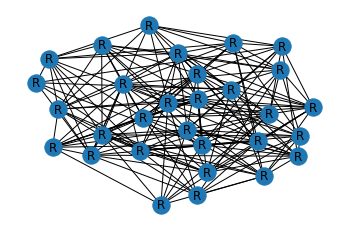

In [78]:
create_SIR_anim(RG, 0.3)

In [79]:
WSM = nx.watts_strogatz_graph(30, 3, 0.6)

In [81]:
create_SIR_anim(WSM, 0.4)

KeyboardInterrupt: 

## part to throw out

C:\Users\Kasia\AppData\Local\Temp\ipykernel_11676\1796811982.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  ani.save(f, writer=writergif)
C:\Users\Kasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
C:\Users\Kasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


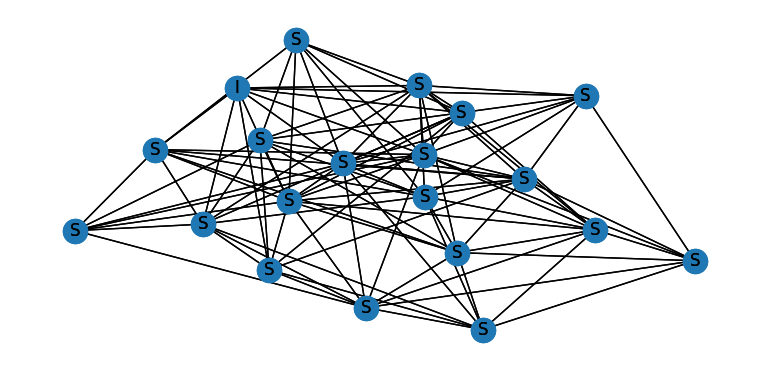

In [118]:
p = 0.6
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()

G = nx.erdos_renyi_graph(20, 0.5)

d = {node : 'S' for node in G.nodes()}
nx.set_node_attributes(G, d, 'state')

infected_node = random.choice(list(G.nodes()))
d[infected_node] = 'I'
nx.set_node_attributes(G, d, 'state')

pos = nx.spring_layout(G)
label = nx.get_node_attributes(G, 'state') 
nx.draw(G, labels=label, pos=pos)

def animate(frame):
    
    infected_list = [infected_node]

#     #while list(set(list(nx.get_node_attributes(G, 'state').values()))) != ['R']:
#     for i in range(steps):
    new_infected_list = []
    for node in infected_list:
        d[node] = 'R'
        for new_infected in G.neighbors(node):
            if G.nodes[new_infected]['state'] == 'S' and random.uniform(0, 1) > p:
                d[new_infected] = 'I'
                new_infected_list.append(new_infected)
    nx.set_node_attributes(G, d, 'state')
    infected_list = new_infected_list
    
label = nx.get_node_attributes(G, 'state') 
nx.draw(G, labels=label, pos=pos)

ani = animation.FuncAnimation(fig, animate, frames=10, interval=1000, repeat=True)

f = "animation.gif" 
writergif = animation.PillowWriter(fps=200) 
ani.save(f, writer=writergif)